In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [5]:
df.isnull().sum(axis=0)

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

In [7]:
len(df)

5572

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [11]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
import matplotlib.pyplot as plt


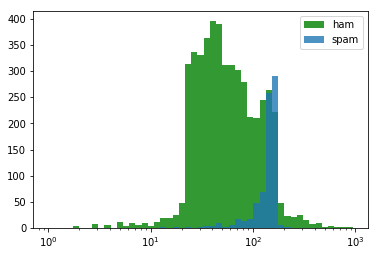

In [13]:
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8,color='green',label='ham')
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8,label='spam')
plt.legend()
plt.show()

In [14]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

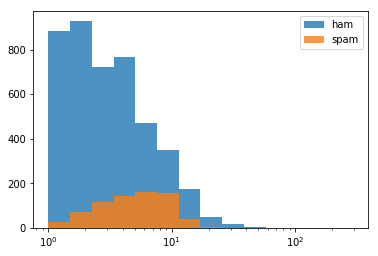

In [15]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['length','punct']]
y = df['label']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_train.shape

(3900, 2)

In [20]:
X_test.shape

(1672, 2)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr_model = LogisticRegression(solver='lbfgs')

In [23]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn import metrics

In [26]:
predictions=lr_model.predict(X_test)

In [27]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [28]:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,1404,44
spam,219,5


In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
predictions = nb_model.predict(X_test)

In [33]:
metrics.confusion_matrix(y_test,predictions)

array([[1438,   10],
       [ 224,    0]], dtype=int64)

In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [35]:
from sklearn.svm import SVC

In [36]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
metrics.confusion_matrix(y_test,predictions)

array([[1373,   75],
       [ 121,  103]], dtype=int64)

In [37]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

